<a href="https://colab.research.google.com/github/dcc7tk/DS2002/blob/main/superheros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [ ]:
import sqlite3

# connect to database
connection = sqlite3.connect('superhero_db.sqlite')
print("Database created and connected!")

# cursor
cursor = connection.cursor()
print("Cursor created!")

# heroes table
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT,
    team TEXT
)
''')
print("Heroes table created!")

# villains table
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')
print("Villains table created!")

# battles table
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
)
''')
print("Battles table created!")

Database created and connected!
Cursor created!
Heroes table created!
Villains table created!
Battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [ ]:
import pandas as pd

# heroes
heroes = pd.read_csv('heroes.csv')
print(heroes.head())
heroes.to_sql('heroes', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the heroes table.")

# villains
villains = pd.read_csv('villains.csv')
print(villains.head())
villains.to_sql('villains', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the villains table.")

# battles
battles = pd.read_csv('battles.csv')
print(battles.head())
battles.to_sql('battles', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the battles table.")

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
Data from CSV has been inserted into the heroes table.
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
Data from CSV has been inserted into the villains table.
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [ ]:
# q1
cursor.execute("SELECT * FROM heroes")
q1 = cursor.fetchall()
print("All superheroes and their powers:")
for each in q1:
    print(each)

# q2
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")
q2 = cursor.fetchall()
print("All battles where the hero won:")
for each in q2:
  print(each)

# q3
cursor.execute("SELECT name, evil_plan FROM villains")
q3 = cursor.fetchall()
print("All villains and their evil plans:")
for each in q3:
  print(each)

# q4
cursor.execute('''
    SELECT hero_id, COUNT(*) AS battle_count
    FROM battles
    GROUP BY hero_id
    ORDER BY battle_count DESC
''')
q4id = cursor.fetchone()
cursor.execute(f"SELECT name FROM heroes WHERE id = {q4id[0]}")
q4 = cursor.fetchone()
print(f"Superhero who has fought the most battles: {q4[0]}")

All superheroes and their powers:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')
All battles where the hero won:
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')
All villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him'

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [ ]:
# sidekick table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    partner_id INTEGER,
    power TEXT
)
''')
print("Sidekick table created!")

# insert
sidekick_data = [
    ("Steve Trevor", 6, "Military"),
    ("She-Hulk", 9, "Super Strength"),
    ("Lois Lane", 4, "Journalism"),
    ("Ned", 1, "Legos"),
    ("Wally West", 8, "Super Speed"),
    ("Wong", 10, "Mystic Arts"),
    ("Robin", 3, "Gadgets"),
    ("Shuri", 7, "Engineering"),
    ("Rhodey", 2, "Powered Armor"),
    ("Loki", 5, "Mischief")
]
cursor.executemany('''
INSERT INTO sidekicks (name, partner_id, power) VALUES (?, ?, ?)
''', sidekick_data)
connection.commit()
print("Data inserted into the sidekick table!")

# sidekicks with the least battles
cursor.execute('''
    SELECT hero_id, COUNT(*) AS count
    FROM battles
    GROUP BY hero_id
    ORDER BY count ASC
''')
s4hero = cursor.fetchone()
cursor.execute(f"SELECT name, power FROM sidekicks WHERE partner_id = {s4hero[0]}")
s4 = cursor.fetchone()
print(f"Sidekick who fought the least battles: {s4}")

Sidekick table created!
Data inserted into the sidekick table!
Sidekick who fought the least battles: ('Shuri', 'Engineering')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

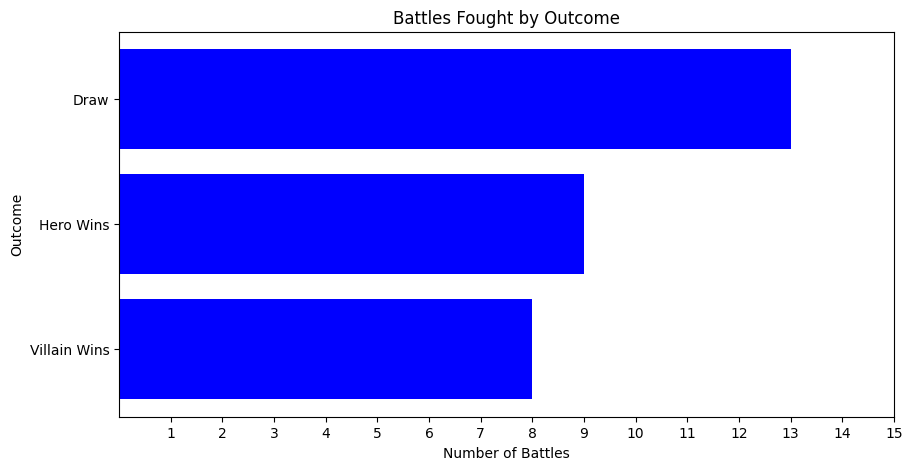

In [ ]:
import matplotlib.pyplot as plt

# number of battles by outcome
cursor.execute('''
    SELECT outcome, COUNT(*) AS count
    FROM battles
    GROUP BY outcome
    ORDER BY count ASC
''')
battle_data = cursor.fetchall()
outcomes = [row[0] for row in battle_data]
battle_counts = [row[1] for row in battle_data]

# plot design
plt.figure(figsize = (10, 5))
plt.barh(outcomes, battle_counts, color='blue')
plt.ylabel('Outcome')
plt.xlabel('Number of Battles')
plt.title('Battles Fought by Outcome')
plt.xticks(range(1, 16))
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!